<a href="https://colab.research.google.com/github/alishalistyaa/IF2120-Twitter-Community-Detection/blob/crawler/community_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
# Alisha Listya Wardhani
# 13521171 / K02
```



# **Setup**

In [ ]:
!pip install 'networkx<2.7'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json

filename ='/content/drive/MyDrive/Akademik/Semester 3/Matematika Diskrit/Dataset/#FIFAWorldCup5000Tweets.json'
tweet_list = []

with open(filename, 'r') as fopen:
    for line in fopen:
        if line != '\n':
            tweet_list.append(json.loads(line))    

In [ ]:
tweet = tweet_list[0]

Check Variables

In [ ]:
tweet.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

# Funcs

In [ ]:
def getTweetID(tweet):
    return tweet.get('id')
    
def getUserIDandScreenName(tweet):
    user = tweet.get('user')
    if user is not None:
        uid = user.get('id')
        screen_name = user.get('screen_name')
        return uid, screen_name
    else:
        return (None, None)

def getRetweetedUserIDandSreenName(tweet):
    retweet = tweet.get('retweeted_status')
    if retweet is not None:
        return getUserIDandScreenName(retweet)
    else:
        return (None, None)
    
def getRepliedUserIDandScreenName(tweet):
    reply_id = tweet.get('in_reply_to_user_id')
    reply_screenname = tweet.get('in_reply_to_screen_name')
    return reply_id, reply_screenname
    
def getUserMentionsIDandScreenName(tweet):  
    mentions = []
    entities = tweet.get('entities')
    if entities is not None:
        user_mentions = entities.get('user_mentions')
        for mention in user_mentions:
            mention_id = mention.get('id')
            screen_name = mention.get('screen_name')
            mentions.append((mention_id, screen_name))
    return mentions

    
def getQuotedUserIDandScreenName(tweet):
    quoted_status = tweet.get('quoted_status')
    if quoted_status is not None:
        return getUserIDandScreenName(quoted_status)
    else:
        return (None, None)
    
def getAllInteractions(tweet):
    # Mendapatkan user id dan screen name pengguna
    tweeter = getUserIDandScreenName(tweet)
    
    # Tidak melakukan apa-apa bila tweeter tidak ada
    if tweeter[0] is None:
        return (None, None), []
    
    # Digunakan struktur data set untuk menghindari duplikat
    interacting_users = set()
    
    # Menambahkan user yang di reply
    interacting_users.add(getRepliedUserIDandScreenName(tweet))
    # Menambahkan user yang di retweeted
    interacting_users.add(getRetweetedUserIDandSreenName(tweet))
    # Menambahkan user yang di quoted
    interacting_users.add(getQuotedUserIDandScreenName(tweet))
    # Menambahkan user yang di mention
    interacting_users.update(getUserMentionsIDandScreenName(tweet))
  
    # Mengapus tweeter jika terdapat didalam set
    interacting_users.discard(tweeter)
    # Menghapus none jika ada
    interacting_users.discard((None,None))
    # Mengembalikan tweeter dan list interaksi
    return tweeter, list(interacting_users)

In [ ]:
print(getUserIDandScreenName(tweet_list[3]))
print(getAllInteractions(tweet_list[6]))

tweet_list[100].get('text')

(20721015, 'ANDREW0675')
((276291652, 'JWatson42'), [(3436726391, 'insoniascarvao')])


'RT @Lila19854723: Qué triste por Brasil, hizo un tremendo mundial 💚💛 Un aplauso para ambos. Justo ganador Croacia. Un país pequeño pero lo…'

# Making Graphs

In [ ]:
import networkx as nx

# Menggunakan graf berarah karena sisi mengarah dari user ke tweet yang dituju (reply, retweet, quote, mention)
G = nx.Graph()

# Perulangan untuk semua tweet dan menambahkan sisi
for tweet in tweet_list:
    # Menemukan influencer pada tweet
    tweeter, interactions = getAllInteractions(tweet)
    tweeter_id, tweeter_name = tweeter
    tweet_id = getTweetID(tweet)
    
    # Perulangan untuk menambakan sisi ke graf
    for interaction in interactions:
        interact_id, interact_name = interaction
        G.add_nodes_from(G.nodes(data=True))
        G.add_edges_from(G.edges(data=True))
        
        G.add_edge(tweeter_id, interact_id, tweet_id=tweet_id)
        
        G.nodes[tweeter_id]['name'] = tweeter_name
        G.nodes[interact_id]['name'] = interact_name
        

In [ ]:
# Mengecek tipe node
print(type(G.nodes))

<class 'networkx.classes.reportviews.NodeView'>


In [ ]:
# Mengecek Node berdasarkan id twitter
nodelist = list(G.nodes.keys())
print(nodelist)

[732178895756087296, 96951800, 309561098, 22910295, 1122511720348553217, 1307683100395216898, 985141786220867585, 27809128, 16350198, 276291652, 3436726391, 2230961521, 138372303, 861610590929924097, 343627165, 353436809, 592885237, 28631535, 1601033266110218241, 1419145241018445825, 823996463747334149, 1395004323134951427, 1364407931442257925, 971845975676477440, 1083685866613211136, 741520638, 2616010943, 47913878, 1518240264854380545, 772877905558994944, 1448303307722657798, 70627707, 1139593579368779777, 939925912660746240, 575549618, 1336304168127111175, 511577335, 533216226, 1365066936938360832, 41472351, 576249121, 1036319994, 402526137, 214690449, 790921536, 1286388018, 961532919650058240, 428304354, 1550628984, 1450420037584576521, 2991843086, 304982427, 146766057, 17306975, 781507754913660929, 462312323, 2154130950, 69962890, 2506282096, 1438155571870449670, 1277236151343087617, 860819985555496960, 1279119983772086272, 1582550819307749378, 76931020, 276293336, 159688179581084

In [ ]:
# Mengecek Info Graph
print("Graph Info: ")
print(nx.info(G))

Graph Info: 
Graph with 4189 nodes and 4237 edges


In [ ]:
# Save graph into gexf file
nx.write_gexf(G, "my_graph.gexf")

# Degree Centrality

In [ ]:
# Rata-rata derajat semua simpul
G.number_of_edges()/G.number_of_nodes()

1.0114585820004773

In [ ]:
# Average Degree per Node
avf = nx.average_degree_connectivity(G)
avf

{1: 98.13339301700985,
 101: 1.297029702970297,
 126: 1.2301587301587302,
 20: 1.6375,
 2: 121.6839378238342,
 413: 1.0314769975786926,
 301: 1.3853820598006645,
 18: 1.5277777777777777,
 229: 2.0087336244541483,
 3: 28.566308243727597,
 9: 1.2222222222222223,
 4: 21.03787878787879,
 7: 4.25,
 8: 1.1666666666666667,
 102: 1.0098039215686274,
 22: 1.2272727272727273,
 29: 3.1206896551724137,
 152: 1.4539473684210527,
 17: 1.2352941176470589,
 60: 1.2166666666666666,
 27: 1.1851851851851851,
 53: 1.1132075471698113,
 5: 24.043243243243243,
 62: 1.1612903225806452,
 13: 1.1538461538461537,
 11: 1.4545454545454546,
 14: 1.7142857142857142,
 36: 2.986111111111111,
 54: 1.1111111111111112,
 46: 1.0434782608695652,
 30: 3.066666666666667,
 32: 3.203125,
 24: 2.7708333333333335,
 96: 1.0104166666666667,
 44: 1.4545454545454546,
 42: 2.2142857142857144,
 10: 17.1,
 6: 14.416666666666666,
 47: 1.148936170212766,
 12: 1.2777777777777777,
 15: 1.8,
 35: 1.5142857142857142,
 67: 1.044776119402985,


In [52]:
# Degree per Node
Degree = G.degree
sorted(G.degree, key=lambda x: x[1], reverse=True)[:12]

[(3436726391, 413),
 (138372303, 301),
 (592885237, 229),
 (28631535, 229),
 (790921536, 152),
 (22910295, 126),
 (511577335, 102),
 (96951800, 101),
 (787361839827062788, 96),
 (2891366827, 67),
 (112764971, 62),
 (462312323, 60)]

In [ ]:
# Degree Centrality
centrality = nx.degree_centrality(G)
sorted(centrality.items(), reverse= True, key=lambda x: x[1])[:10]

[(3436726391, 0.09861509073543458),
 (138372303, 0.0718720152817574),
 (592885237, 0.0546800382043935),
 (28631535, 0.0546800382043935),
 (790921536, 0.03629417382999045),
 (22910295, 0.03008595988538682),
 (511577335, 0.024355300859598854),
 (96951800, 0.02411652340019102),
 (787361839827062788, 0.022922636103151862),
 (2891366827, 0.015998089780324735)]

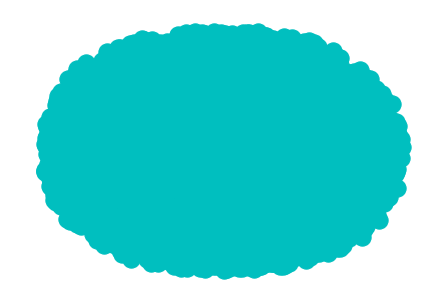

In [ ]:
# Visualisasi Graph
nx.draw(G, pos=nx.spring_layout(G,k=.12),node_color='c',edge_color='k')